# Übung 3 - Merkmalsextraktion 

**Name:** Hatem Al-tayi, **Matr.-Nr.:** 557187

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 19.12.2019
<br>
**Abgabe:** So, 30.01.2020, 23:55 Uhr

---

## Aufgabenbeschreibung

Das Ziel dieser Übung ist es, den prinzipiellen Ablauf einer Bildanalyse (inkl. einzelne Teilschritte) auf ein Bild aunzuwenden und somit auch den Zusammenhang einzelner Operationen besser nachzuvollziehen.

![AblaufBildanalyse](AblaufBildanalyse.png)




### Generelle Hinweise zur Bearbeitung: 

Die Herausforderung hierbei ist, dass mehrere Phasen der Bildverarbeitung aufeinander aufbauend umgesetzt werden müssen. Zudem ist die Planung sowie die Durchführung des Lösungsweges (ohne konkrete Vorgaben) Ihnen überlassen. Jedoch sollten Sie folgende allgemeine und hilfreiche "Werkzeuge" ins Betracht ziehen:

**Phasen der Bildverarbeitung:**
1.	Bild öffnen
2.	Bildvorverarbeitung
3.	Segmentierung
4.	Objekterkennung
5.	Analyse
6.	Visualisierung

**Zur Segmentierung:**
1.	Iterative Berechnung des optimalen Schwellenwertes
2.	Histogrammanalyse für multimodale Histogramme

**Zur Objekterkennung**
1.	Algorithmus zur Detektion von Kreisen
2.	Hough-Transformation
3.	Skelettierung



### Hinweise zur Abgabe und zur Benotung

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000_s0500001.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.
- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 40% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

## Aufgabenbeschreibung

Lesen Sie `roentgen.tif` mit Hilfe der `matplotlib`-Bibliothek ein. Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`).

1.	Berechnen Sie die Anzahl der Finger im Bild.
2.	Finden Sie die Knochen und die Hand. Berechnen Sie dazu den Anteil der Knochen an der Gesamtfläche der Hand.
3.	Berechnen Sie die Anzahl gesamten (einzelnen) Knochen.
 
**Bonus:** 
4. Berechnen Sie die zusätzlich zur Anzahl auch die maximale Länge jedes Knochens.

### Achtung:

1. Die Lösung soll gelten für:
    - beliebig große Bilder (Zeilen- und Spaltenanzahl)
    - andere Bilder als das Testbild (z.B. `Testbild_Roentgen2.jpg`), jedoch in demselben Bildtyp (Grau- oder Farbbild) und mit derselben Art von Objekten
    - Objekte an beliebiger Stelle im Bild (auch Objekte an Rändern und Ecken können vorkommen!). „Unvollständige“ Objekte müssen allerdings nicht berücksichtigt werden. Also berücksichtigen Sie bitte, anders als in den Übungen, auch die Sonderfälle. 
    

2. Der Quellcode wird für die Benotung auch an anderen Bildern als diesen Testbildern getestet!


3. Bewertet werden:
    - Das Ergebnis (Anzahl gefundener Objekte, Ergebnis der Analysen, etc.)
    - Der Lösungsweg (Programmaufbau, Geschwindigkeit, benutzte Algorithmen)
    - Fehlerresistenz und Allgemeingültigkeit (Test mit anderen Bildern)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

from skimage import color
from skimage import feature
from scipy.ndimage import distance_transform_edt
from skimage import measure
from skimage import morphology, segmentation
from sklearn.cluster import KMeans
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.feature import canny
from skimage.exposure import histogram
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io

img = io.imread('roentgen.tif', as_gray=True)
thresh = threshold_otsu(img)
binary = img > thresh

plt.figure(figsize=(8,8))

fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

<Figure size 800x800 with 0 Axes>

<Figure size 1500x600 with 3 Axes>

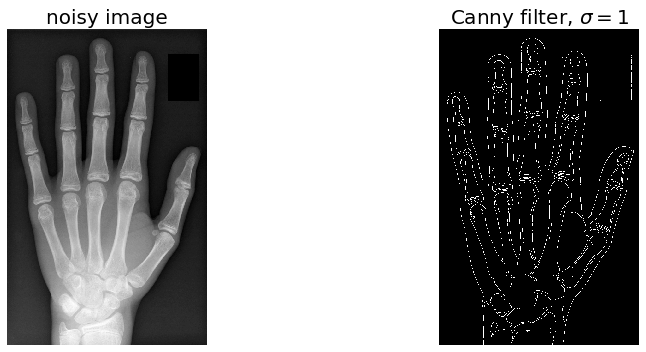

In [2]:
# Generate noisy image of a square
img=cv2.imread('roentgen.tif',0)

# Compute the Canny filter for two values of sigma
edges = feature.canny(img)

# display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                                    sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)


fig.tight_layout()

plt.show()

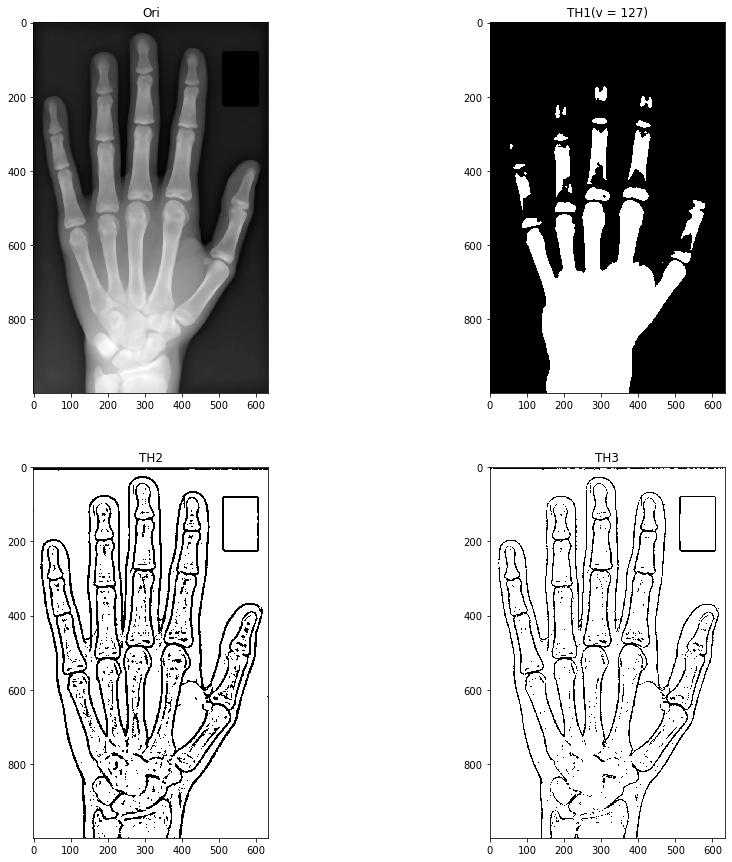

In [3]:
img = cv2.imread('roentgen.tif',0)
img = cv2.medianBlur(img,9)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title("Ori")
plt.subplot(2, 2, 2),plt.imshow(th1, cmap='gray')
plt.title("TH1(v = 127)")
plt.subplot(2, 2,3), plt.imshow(th2, cmap='gray')
plt.title('TH2')
plt.subplot(2, 2,4),plt.imshow(th3, cmap='gray')
plt.title('TH3')
plt.show()

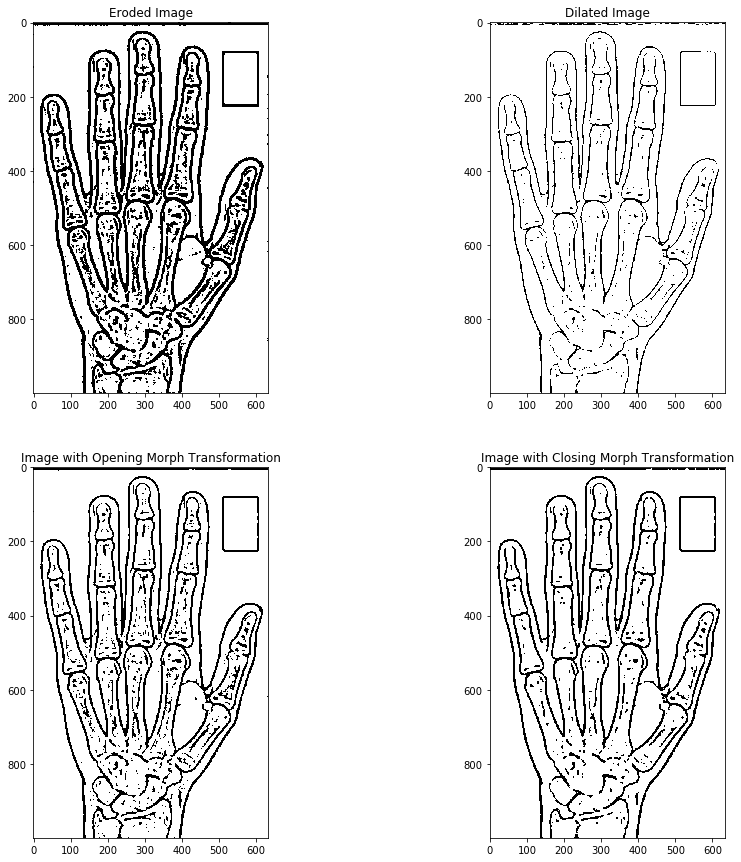

In [4]:
image = th2

# Hier werden alle Pixel in der Nähe der Grenze, abhängig von der Größe des Kernels und je nach 
# Morphologischem Operator zB verwerfen.
kernel = np.ones((3,3), np.uint8)

# Hier werden die verschiedenen Morphologischen Operatoren aufgeführt
# Achtung bei cv2 werden die Kernel auf die weißen Pixel angewendet (Dilatation wird dadurch kleiner statt größer)
image_erosion = cv2.erode(image,kernel,iterations=1)
image_dilation = cv2.dilate(image,kernel,iterations=1)
image_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
image_closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15,15))

plt.subplot(2, 2,1),plt.imshow(image_erosion, cmap='gray')
plt.title("Eroded Image")
plt.subplot(2, 2,2),plt.imshow(image_dilation, cmap='gray')
plt.title("Dilated Image")
plt.subplot(2, 2,3),plt.imshow(image_opening, cmap='gray')
plt.title("Image with Opening Morph Transformation")
plt.subplot(2, 2,4),plt.imshow(image_closing, cmap='gray')
plt.title("Image with Closing Morph Transformation")
plt.show()

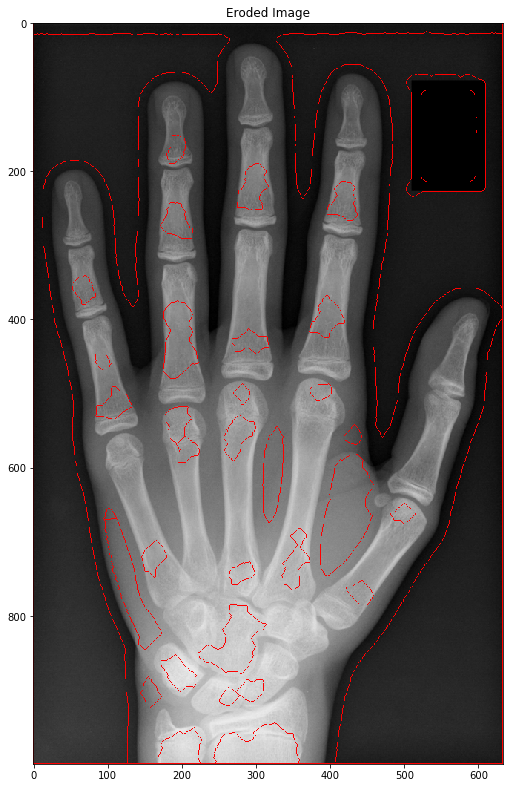

In [5]:
img = cv2.imread('roentgen.tif')
thresh= image_closing

kernel = np.ones((1,1),np.uint8)

# sure background area
sure_bg = cv2.dilate(thresh,kernel,iterations = 1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,0)
ret, sure_fg = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
img_thresh= cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img_thresh,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(30,30))
plt.subplot(2, 2,1),plt.imshow(img)
plt.title("Eroded Image")


plt.show()

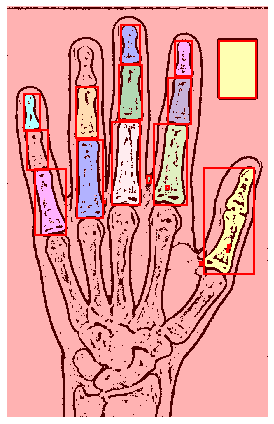

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, erosion, opening
from skimage.color import label2rgb




# remove artifacts connected to image border
cleared = clear_border(image_opening)

# label image regions
label_image = label(cleared,background=0)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

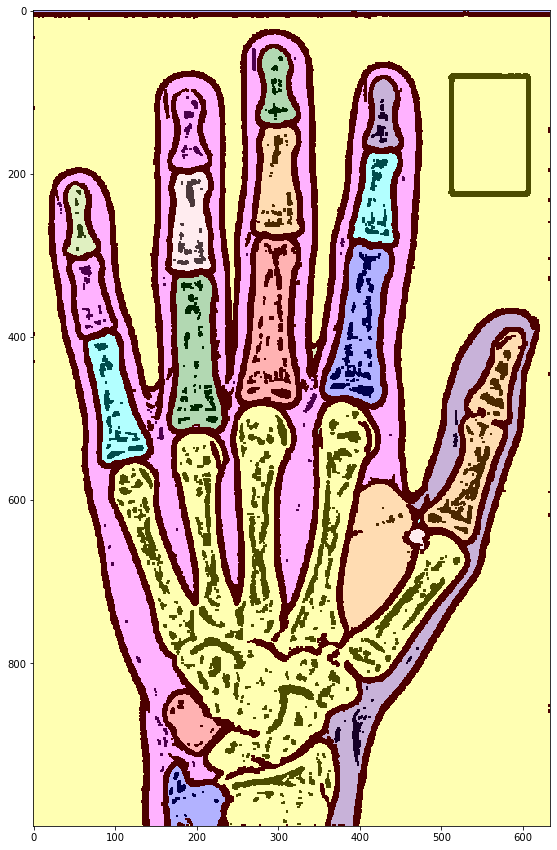

In [7]:
from skimage import data
from skimage.exposure import histogram
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage import feature

image = image_erosion

edges = feature.canny(image)

fill_image = ndi.binary_fill_holes(edges)

label_objects, nb_labels = ndi.label(fill_image)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
image_cleaned = mask_sizes[label_objects]

markers = np.zeros_like(image)

elevation_map = sobel(image)

markers = np.zeros_like(image)
markers[image < 100] = 1
markers[image > 150 ] = 2

segmentations = watershed(elevation_map, markers)

segmentations = ndi.binary_fill_holes(segmentations-1)

labeled_image, _ = ndi.label(segmentations)
image_label_overlay = label2rgb(labeled_image, image=image)

plt.figure(figsize=(15,15))
plt.imshow(image_label_overlay)
plt.show()